In [1]:
! git clone https://github.com/ZenoMK/L65_JohnPoole_ZenoKujawa.git

Cloning into 'L65_JohnPoole_ZenoKujawa'...
remote: Enumerating objects: 1432, done.
remote: Counting objects: 100% (1008/1008), done.
remote: Compressing objects: 100% (364/364), done.
remote: Total 1432 (delta 763), reused 846 (delta 641), pack-reused 424
Receiving objects: 100% (1432/1432), 415.28 KiB | 11.22 MiB/s, done.
Resolving deltas: 100% (1002/1002), done.


In [2]:
! cd L65_JohnPoole_ZenoKujawa/L65_JohnPoole_ZenoKujawa

/bin/bash: line 0: cd: L65_JohnPoole_ZenoKujawa/L65_JohnPoole_ZenoKujawa: No such file or directory


In [3]:
! pip install dm-haiku
! pip install graphlib
! pip install networkx
! pip install dm-clrs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 371.7/371.7 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.5 which is incompatible.
tensorflow 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.
  Preparing metadata (setup.py) ... - done
  Created wheel for graphlib: filename=graphlib-0.9.5-py3-none-any.whl size=9634 sha256=ea93d08773a3f8cd75e3668063b4374fd873a170be3504b32041a41db1bb7498
  Stored in directory: /root/.cach

In [4]:
%cd L65_JohnPoole_ZenoKujawa/

/kaggle/working/L65_JohnPoole_ZenoKujawa


# Run Command

In [5]:
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_first64 --test_length 64
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_second64 --test_length 64
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_third64 --test_length 64
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fourth64 --test_length 64
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fifth64 --test_length 64"""

2024-03-13 02:10:59.112472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 02:10:59.112593: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 02:10:59.243428: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0313 02:11:14.911602 133554897995584 xla_bridge.py:660] Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
I0313 02:11:14.914156 133554897995584 xla_bridge.py:660] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file:

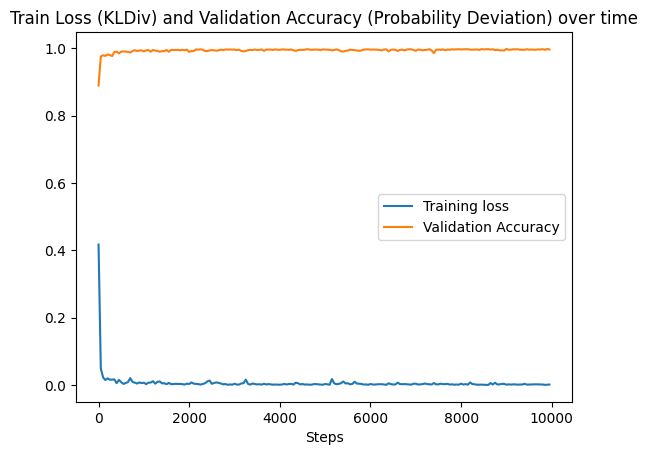

In [6]:
import pandas as pd 
import matplotlib.pyplot as plt
data = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/score-results-UPDATEMYNAME.csv", skiprows = 1)
plt.plot(data["Num Steps"], data["Train KlDiv"], label = "Training loss")
plt.plot(data["Num Steps"], data["Mean 1-abs(error)"], label = "Validation Accuracy")
plt.legend()
plt.title("Train Loss (KLDiv) and Validation Accuracy (Probability Deviation) over time")
plt.xlabel("Steps")
plt.savefig("trainingfig.png")
plt.show()

In [7]:
import numpy as np
firstrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_first64.csv")
secondrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_second64.csv")
thirdrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_third64.csv")
#fourthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fourth64.csv")
#fifthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fifth64.csv")

runs = [firstrun, secondrun, thirdrun]#, fourthrun, fifthrun]
results_summary64 = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[runs[0]["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[runs[0]["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[runs[0]["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[runs[0]["Random_True_Accuracy"][0]],
                                "Beam_Model_Accuracy":[runs[0]["Beam_Model_Accuracy"][0]],
                               "Beam_True_Accuracy":[runs[0]["Beam_True_Accuracy"][0]],
                                "Greedy_Model_Accuracy":[runs[0]["Greedy_Model_Accuracy"][0]],
                               "Greedy_True_Accuracy":[runs[0]["Greedy_True_Accuracy"][0]],
                                "mean_uniqueness_model_beam" :[np.mean(runs[0]["Beam_Model_Uniques"])],
                                "mean_valids_model_beam" : [np.mean(runs[0]["Beam_Model_Valids"])],
                                "mean_valids_uniques_model_beam" : [np.mean(runs[0]["Beam_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_beam" :[np.mean(runs[0]["Beam_True_Uniques"])],
                                "mean_valids_true_beam" : [np.mean(runs[0]["Beam_True_Valids"])],
                                "mean_valids_uniques_true_beam" : [np.mean(runs[0]["Beam_True_Valids_Uniques"])],
                                "mean_uniqueness_model_greedy" :[np.mean(runs[0]["Greedy_Model_Uniques"])],
                                "mean_valids_model_greedy" : [np.mean(runs[0]["Greedy_Model_Valids"])],
                                "mean_valids_uniques_model_greedy" : [np.mean(runs[0]["Greedy_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_greedy" :[np.mean(runs[0]["Greedy_True_Uniques"])],
                                "mean_valids_true_greedy" : [np.mean(runs[0]["Greedy_True_Valids"])],
                                "mean_valids_uniques_true_greedy" : [np.mean(runs[0]["Greedy_True_Valids_Uniques"])]})
for df in runs[1:]:
    extract_data = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[df["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[df["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[df["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[df["Random_True_Accuracy"][0]],
                               "Beam_Model_Accuracy":[df["Beam_Model_Accuracy"][0]],
                               "Beam_True_Accuracy":[df["Beam_True_Accuracy"][0]],
                                "Greedy_Model_Accuracy":[df["Greedy_Model_Accuracy"][0]],
                               "Greedy_True_Accuracy":[df["Greedy_True_Accuracy"][0]],
                                "mean_uniqueness_model_beam" :[np.mean(df["Beam_Model_Uniques"])],
                                "mean_valids_model_beam" : [np.mean(df["Beam_Model_Valids"])],
                                "mean_valids_uniques_model_beam" : [np.mean(df["Beam_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_beam" :[np.mean(df["Beam_True_Uniques"])],
                                "mean_valids_true_beam" : [np.mean(df["Beam_True_Valids"])],
                                "mean_valids_uniques_true_beam" : [np.mean(df["Beam_True_Valids_Uniques"])],
                                "mean_uniqueness_model_greedy" :[np.mean(df["Greedy_Model_Uniques"])],
                                "mean_valids_model_greedy" : [np.mean(df["Greedy_Model_Valids"])],
                                "mean_valids_uniques_model_greedy" : [np.mean(df["Greedy_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_greedy" :[np.mean(df["Greedy_True_Uniques"])],
                                "mean_valids_true_greedy" : [np.mean(df["Greedy_True_Valids"])],
                                "mean_valids_uniques_true_greedy" : [np.mean(df["Greedy_True_Valids_Uniques"])]})
    results_summary64 = pd.concat((results_summary64, extract_data))

print(results_summary64)

   Argmax_Model_Accuracy  Argmax_True_Accuracy  Random_Model_Accuracy  \
0               0.640625                   1.0                    0.0   
0               0.500000                   1.0                    0.0   
0               0.468750                   1.0                    0.0   

   Random_True_Accuracy  Beam_Model_Accuracy  Beam_True_Accuracy  \
0                   0.0             0.531250                 1.0   
0                   0.0             0.453125                 1.0   
0                   0.0             0.203125                 1.0   

   Greedy_Model_Accuracy  Greedy_True_Accuracy  mean_uniqueness_model_beam  \
0               0.406250                   1.0                    1.000000   
0               0.265625                   1.0                    0.996875   
0               0.203125                   1.0                    1.000000   

   mean_valids_model_beam  mean_valids_uniques_model_beam  \
0                0.490625                        0.490625   

In [8]:
results_summary64.describe()

,Argmax_Model_Accuracy,Argmax_True_Accuracy,Random_Model_Accuracy,Random_True_Accuracy,Beam_Model_Accuracy,Beam_True_Accuracy,Greedy_Model_Accuracy,Greedy_True_Accuracy,mean_uniqueness_model_beam,mean_valids_model_beam,mean_valids_uniques_model_beam,mean_uniqueness_true_beam,mean_valids_true_beam,mean_valids_uniques_true_beam,mean_uniqueness_model_greedy,mean_valids_model_greedy,mean_valids_uniques_model_greedy,mean_uniqueness_true_greedy,mean_valids_true_greedy,mean_valids_uniques_true_greedy
count,3.000000,3.0,3.0,3.0,3.000000,3.0,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.0,3.000000,3.000000,3.000000,3.0,3.0
mean,0.536458,1.0,0.0,0.0,0.395833,1.0,0.291667,1.0,0.998958,0.398958,0.399219,0.994792,1.0,1.0,1.0,0.303125,0.303125,0.995833,1.0,1.0
std,0.091554,0.0,0.0,0.0,0.171401,0.0,0.104036,0.0,0.001804,0.150725,0.150939,0.004774,0.0,0.0,0.0,0.067676,0.067676,0.004774,0.0,0.0
min,0.468750,1.0,0.0,0.0,0.203125,1.0,0.203125,1.0,0.996875,0.225000,0.225000,0.990625,1.0,1.0,1.0,0.231250,0.231250,0.990625,1.0,1.0
25%,0.484375,1.0,0.0,0.0,0.328125,1.0,0.234375,1.0,0.998437,0.353125,0.353516,0.992188,1.0,1.0,1.0,0.271875,0.271875,0.993750,1.0,1.0
50%,0.500000,1.0,0.0,0.0,0.453125,1.0,0.265625,1.0,1.000000,0.481250,0.482031,0.993750,1.0,1.0,1.0,0.312500,0.312500,0.996875,1.0,1.0
75%,0.570312,1.0,0.0,0.0,0.492188,1.0,0.335938,1.0,1.000000,0.485938,0.486328,0.996875,1.0,1.0,1.0,0.339063,0.339063,0.998437,1.0,1.0
max,0.640625,1.0,0.0,0.0,0.531250,1.0,0.406250,1.0,1.000000,0.490625,0.490625,1.000000,1.0,1.0,1.0,0.365625,0.365625,1.000000,1.0,1.0


In [9]:
results_summary64.to_csv("summarised_results64.csv")

In [10]:
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_first5 --test_length 5
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_second5 --test_length 5
!python -m clrs.examples.run --train_steps 10000 --algorithms bellman_ford --hint_mode none --results_df True --save_df True --save_model_to_file True --filename bf_third5 --test_length 5
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fourth5 --test_length 5
#!python -m clrs.examples.run --train_steps 10000 --algorithms dfs --hint_mode none --results_df True --save_df True --save_model_to_file True --filename fifth5 --test_length 5

2024-03-13 04:48:10.684144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 04:48:10.684213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 04:48:10.685884: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
I0313 04:48:17.436822 137347295635264 xla_bridge.py:660] Unable to initialize backend 'rocm': NOT_FOUND: Could not find registered platform with name: "rocm". Available platform names are: CUDA
I0313 04:48:17.438269 137347295635264 xla_bridge.py:660] Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file:

In [11]:
import numpy as np
firstrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_first5.csv")
secondrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_second5.csv")
thirdrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/bf_third5.csv")
#fourthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fourth5.csv")
#fifthrun = pd.read_csv("/kaggle/working/L65_JohnPoole_ZenoKujawa/fifth5.csv")

runs = [firstrun, secondrun, thirdrun]#, fourthrun, fifthrun]
results_summary5 = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[runs[0]["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[runs[0]["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[runs[0]["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[runs[0]["Random_True_Accuracy"][0]],
                                "Beam_Model_Accuracy":[runs[0]["Beam_Model_Accuracy"][0]],
                               "Beam_True_Accuracy":[runs[0]["Beam_True_Accuracy"][0]],
                                "Greedy_Model_Accuracy":[runs[0]["Greedy_Model_Accuracy"][0]],
                               "Greedy_True_Accuracy":[runs[0]["Greedy_True_Accuracy"][0]],
                                "mean_uniqueness_model_beam" :[np.mean(runs[0]["Beam_Model_Uniques"])],
                                "mean_valids_model_beam" : [np.mean(runs[0]["Beam_Model_Valids"])],
                                "mean_valids_uniques_model_beam" : [np.mean(runs[0]["Beam_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_beam" :[np.mean(runs[0]["Beam_True_Uniques"])],
                                "mean_valids_true_beam" : [np.mean(runs[0]["Beam_True_Valids"])],
                                "mean_valids_uniques_true_beam" : [np.mean(runs[0]["Beam_True_Valids_Uniques"])],
                                "mean_uniqueness_model_greedy" :[np.mean(runs[0]["Greedy_Model_Uniques"])],
                                "mean_valids_model_greedy" : [np.mean(runs[0]["Greedy_Model_Valids"])],
                                "mean_valids_uniques_model_greedy" : [np.mean(runs[0]["Greedy_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_greedy" :[np.mean(runs[0]["Greedy_True_Uniques"])],
                                "mean_valids_true_greedy" : [np.mean(runs[0]["Greedy_True_Valids"])],
                                "mean_valids_uniques_true_greedy" : [np.mean(runs[0]["Greedy_True_Valids_Uniques"])]})
for df in runs[1:]:
    extract_data = pd.DataFrame.from_dict({"Argmax_Model_Accuracy":[df["Argmax_Model_Accuracy"][0]],
                                "Argmax_True_Accuracy":[df["Argmax_True_Accuracy"][0]],
                                "Random_Model_Accuracy":[df["Random_Model_Accuracy"][0]],
                               "Random_True_Accuracy":[df["Random_True_Accuracy"][0]],
                               "Beam_Model_Accuracy":[df["Beam_Model_Accuracy"][0]],
                               "Beam_True_Accuracy":[df["Beam_True_Accuracy"][0]],
                                "Greedy_Model_Accuracy":[df["Greedy_Model_Accuracy"][0]],
                               "Greedy_True_Accuracy":[df["Greedy_True_Accuracy"][0]],
                                "mean_uniqueness_model_beam" :[np.mean(df["Beam_Model_Uniques"])],
                                "mean_valids_model_beam" : [np.mean(df["Beam_Model_Valids"])],
                                "mean_valids_uniques_model_beam" : [np.mean(df["Beam_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_beam" :[np.mean(df["Beam_True_Uniques"])],
                                "mean_valids_true_beam" : [np.mean(df["Beam_True_Valids"])],
                                "mean_valids_uniques_true_beam" : [np.mean(df["Beam_True_Valids_Uniques"])],
                                "mean_uniqueness_model_greedy" :[np.mean(df["Greedy_Model_Uniques"])],
                                "mean_valids_model_greedy" : [np.mean(df["Greedy_Model_Valids"])],
                                "mean_valids_uniques_model_greedy" : [np.mean(df["Greedy_Model_Valids_Uniques"])],
                                "mean_uniqueness_true_greedy" :[np.mean(df["Greedy_True_Uniques"])],
                                "mean_valids_true_greedy" : [np.mean(df["Greedy_True_Valids"])],
                                "mean_valids_uniques_true_greedy" : [np.mean(df["Greedy_True_Valids_Uniques"])]})
    results_summary5 = pd.concat((results_summary5, extract_data))

print(results_summary5)

   Argmax_Model_Accuracy  Argmax_True_Accuracy  Random_Model_Accuracy  \
0                    1.0                   1.0                    0.0   
0                    1.0                   1.0                    0.0   
0                    1.0                   1.0                    0.0   

   Random_True_Accuracy  Beam_Model_Accuracy  Beam_True_Accuracy  \
0                   0.0                  1.0                 1.0   
0                   0.0                  1.0                 1.0   
0                   0.0                  1.0                 1.0   

   Greedy_Model_Accuracy  Greedy_True_Accuracy  mean_uniqueness_model_beam  \
0                    1.0                   1.0                     0.20000   
0                    1.0                   1.0                     0.20625   
0                    1.0                   1.0                     0.20000   

   mean_valids_model_beam  mean_valids_uniques_model_beam  \
0                     1.0                             1.0   

In [12]:
results_summary5.describe()

,Argmax_Model_Accuracy,Argmax_True_Accuracy,Random_Model_Accuracy,Random_True_Accuracy,Beam_Model_Accuracy,Beam_True_Accuracy,Greedy_Model_Accuracy,Greedy_True_Accuracy,mean_uniqueness_model_beam,mean_valids_model_beam,mean_valids_uniques_model_beam,mean_uniqueness_true_beam,mean_valids_true_beam,mean_valids_uniques_true_beam,mean_uniqueness_model_greedy,mean_valids_model_greedy,mean_valids_uniques_model_greedy,mean_uniqueness_true_greedy,mean_valids_true_greedy,mean_valids_uniques_true_greedy
count,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.000000,3.0,3.0,3.000000,3.0,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0
mean,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.202083,1.0,1.0,0.202083,1.0,1.0,0.212500,0.998958,0.997396,0.202083,1.0,1.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003608,0.0,0.0,0.003608,0.0,0.0,0.008268,0.001804,0.004511,0.003608,0.0,0.0
min,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.200000,1.0,1.0,0.200000,1.0,1.0,0.203125,0.996875,0.992188,0.200000,1.0,1.0
25%,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.200000,1.0,1.0,0.200000,1.0,1.0,0.209375,0.998437,0.996094,0.200000,1.0,1.0
50%,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.200000,1.0,1.0,0.200000,1.0,1.0,0.215625,1.000000,1.000000,0.200000,1.0,1.0
75%,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.203125,1.0,1.0,0.203125,1.0,1.0,0.217187,1.000000,1.000000,0.203125,1.0,1.0
max,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.206250,1.0,1.0,0.206250,1.0,1.0,0.218750,1.000000,1.000000,0.206250,1.0,1.0


In [13]:
results_summary5.to_csv("summarised_results5.csv")